In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import glob
import os
sys.path.append('../')
from package_global_functions import *

def getColormapsPath():
    extSSDpath = getExternalSSDpath()
    if os.path.exists(extSSDpath):
        path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
    else:
        path = '/res_files'
    return path

def getTlinesPath():
    extSSDpath = getExternalSSDpath()
    if os.path.exists(extSSDpath):
        path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
    else:
        path = '/res_files'
    return path

In [7]:
latexFont(ticklabelssize=12,labelsize=14)

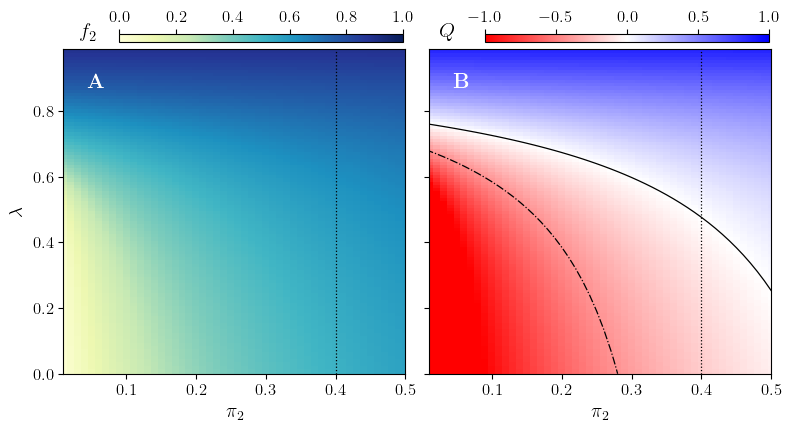

In [22]:
pi1, q1, q2 = 0.4, 7, 10

fig, ax = plt.subplots(1,2, figsize=(3.9*2,4.2), constrained_layout=True)
for i in range(2):
    ax[i].set_xlim(0.01, 0.5)
    ax[i].set_ylim(0.0, 0.99)
fsMesh = np.load(f'{getColormapsPath()}/map_asym_fixPi1_q1_{q1}_q2_{q2}_pi1_{pi1}.npz')
Qmesh = fsMesh['fs'][2] - 2*fsMesh['fs'][1]

ax[0].set(xlabel='$\pi_2$', ylabel='$\lambda$')
im = ax[0].pcolormesh(fsMesh['x'], fsMesh['y'], fsMesh['fs'][2], vmin =0, vmax =1, cmap='YlGnBu', shading='nearest', rasterized=True)
fig.colorbar(im, ax=ax[0], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0))

ax[1].tick_params(labelleft=False)
maxQ = 1
#maxQ = abs(Qmesh).max()
ax[1].set(xlabel='$\pi_2$')
im = ax[1].pcolormesh(fsMesh['x'], fsMesh['y'], Qmesh, vmin = -maxQ, vmax = maxQ, cmap='bwr_r', shading='nearest', rasterized=True)
for x,ls in zip([1, 2], ['-.', '-']):
    tline = pd.read_csv(f'{getColormapsPath()}/Tline_asym_fixPi1_pi1_{pi1}_q1_{float(q1)}_q2_{float(q2)}_f2_{int(x)}f1.csv')
    tline = tline.query('pi2 >= 0.005')
    tline = tline.rename(columns={'lambda':'l'})
    # in case there are NaNs:
    if tline['l'].isnull().values.any():
        i_last_pi2 = tline.query('l != l').iloc[0].name
        tline.at[i_last_pi2, 'l'] = 0.0
    ax[1].plot(tline['pi2'], tline['l'], color='xkcd:black', lw=0.9, ls=ls)
fig.colorbar(im, ax=ax[1], location='top', fraction=0.05, aspect=35, pad=0.02, shrink=0.83, anchor=(0.96, 1.0),
             ticks=[-1.0, -0.5, 0.0, 0.5, 1.0])

ax[0].text(0.07,0.88, r'$\textbf{A}$', transform=ax[0].transAxes, color='xkcd:white')
ax[1].text(0.07,0.88, r'$\textbf{B}$', transform=ax[1].transAxes, color='xkcd:white')
fig.text(0.095, 0.925, r'$f_2$', color='xkcd:black')
fig.text(0.555, 0.925, r'$Q$', color='xkcd:black')
for i in range(2):
    ax[i].axvline(0.4, lw=0.9, ls=':', color='xkcd:black')


fig.savefig(f'sup_figure_asymmetric_q1_{q1}_q2_{q2}_pi1_{pi1}.pdf')